# Alineamiento con Biopython

## de la pagina
https://medium.com/towards-data-science/pairwise-sequence-alignment-using-biopython-d1a9d0ba861f


In [5]:
from Bio import pairwise2, SeqIO
from Bio.pairwise2 import format_alignment
from Bio import AlignIO

In [2]:
X = "ACGGGT"

In [3]:
Y = "ACG"

In [4]:
alignements = pairwise2.align.globalxx(X, Y)

In [5]:
for a in alignements:
    print (format_alignment(*a))

ACGGGT
||||||
AC--G-
  Score=3

ACGGGT
||||||
AC-G--
  Score=3

ACGGGT
||||||
ACG---
  Score=3



In [6]:
alignements = pairwise2.align.localxx(X, Y)
for a in alignements:
    print (format_alignment(*a))

ACGGGT
|||||
AC--G-
  Score=3

ACGGGT
||||
AC-G--
  Score=3

ACGGGT
|||
ACG---
  Score=3



In [7]:
alignements =  pairwise2.align.globalms(X, Y, 2, -1, -0.5, -0.1)
for a in alignements:
    print (format_alignment(*a))

ACGGGT
||||||
ACG---
  Score=5.3



# example 1

In [8]:
# Import pairwise2 module
from Bio import pairwise2

# Import format_alignment method
from Bio.pairwise2 import format_alignment

# Define two sequences to be aligned
X = "ACGGGT"
Y = "ACG"

# Get a list of the global alignments between the two sequences ACGGGT and ACG
# No parameters. Identical characters have score of 1, else 0.
# No gap penalties.
alignments = pairwise2.align.globalxx(X, Y)

# Use format_alignment method to format the alignments in the list
for a in alignments:
    print(format_alignment(*a))

ACGGGT
||||||
AC--G-
  Score=3

ACGGGT
||||||
AC-G--
  Score=3

ACGGGT
||||||
ACG---
  Score=3



# example 2

In [9]:
# Import pairwise2 module
from Bio import pairwise2

# Import format_alignment method
from Bio.pairwise2 import format_alignment

# Define two sequences to be aligned
X = "ACGGGT"
Y = "ACG"

# Get a list of the local alignments between the two sequences ACGGGT and ACG
# No parameters. Identical characters have score of 1, else 0.
# No gap penalties.
alignments = pairwise2.align.localxx(X, Y)

# Use format_alignment method to format the alignments in the list
for a in alignments:
    print(format_alignment(*a))


ACGGGT
|||||
AC--G-
  Score=3

ACGGGT
||||
AC-G--
  Score=3

ACGGGT
|||
ACG---
  Score=3



# example 3

In [10]:
# Import pairwise2 module
from Bio import pairwise2

# Import format_alignment method
from Bio.pairwise2 import format_alignment

# Define two sequences to be aligned
X = "ACGGGT"
Y = "ACG"

# Get a list of the global alignments between the two sequences ACGGGT and ACG satisfying the given scoring
# A match score is the score of identical chars, else mismatch score.
# Same open and extend gap penalties for both sequences.
alignments = pairwise2.align.globalms(X, Y, 2, -1, -0.5, -0.1)

# Use format_alignment method to format the alignments in the list
for a in alignments:
    print(format_alignment(*a))
    

ACGGGT
||||||
ACG---
  Score=5.3



## Ejercicio

In [1]:
pwd

'/home/user1/Desktop/jupyter'

In [2]:
cd ~/Desktop/data/fasta/

/home/user1/Desktop/data/fasta


In [3]:
from Bio.SeqRecord import SeqRecord

In [6]:
f= open("secuencias_anotadas.fasta")
n=0
secuencias=[]
for rec in SeqIO.parse(f, "fasta"):
    rec1 = rec.id[:rec.id.find("_")]
    #rec.id = rec1
    print (rec.id, "\t", rec1)
    linea =SeqRecord((rec.seq), id=rec1, description=rec.description)
    secuencias.append(linea)


    

Nav1_2_B_halotolerans 	 Nav1
Nav1_8_B_aquimaris 	 Nav1
Nav2_2_A_mediterranea 	 Nav2
PET1_2_H_chejuensis 	 PET1
PET1_8_P_oceani 	 PET1
PET2_2_A_mediterranea 	 PET2
PET2_8_A_mediterranea 	 PET2
PETsn1_2_A_mediterranea 	 PETsn1
PETsn1_8_A_mediterranea 	 PETsn1
PHBb1_2_L_janthinus 	 PHBb1


# Alineamiento

In [7]:
import os
from Bio.Align.Applications import ClustalwCommandline

In [9]:
clustalw_exe = r"/home/user1/Applications/clustalw/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="secuencias_anotadas.fasta")
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()


ApplicationError: Non-zero return code 126 from '/home/user1/Applications/clustalw/clustalw2 -infile=secuencias_anotadas.fasta', message '/bin/sh: 1: /home/user1/Applications/clustalw/clustalw2: Permission denied'

In [36]:
clustalw_exe = r"/home/user1/Applications/clustalw/clustalw2"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="secuencias_comp.fas")
assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

ApplicationError: Non-zero return code 126 from '/home/user1/Applications/clustalw/clustalw2 -infile=secuencias_comp.fas', message '/bin/sh: 1: /home/user1/Applications/clustalw/clustalw2: Permission denied'

In [33]:
ls 

img/  secuencias_comp.fas


In [30]:
os.path.isfile('/home/user1/Applications/clustalw/clustalw2')

True

In [27]:
clustalw_exe


'~/Applications/clustalw/clustalw2'

In [ ]:
alignments = AlignIO.parse("../fasta/secuencias_alinear.aln", "clustal")
for alignment in alignments:
    print(alignment)
    print("")

# para obtener ayuda en clustalw

In [12]:
!/Applications/clustalw/clustalw2 -help




 CLUSTAL 2.1 Multiple Sequence Alignments


                DATA (sequences)

-INFILE=file.ext                             :input sequences.
-PROFILE1=file.ext  and  -PROFILE2=file.ext  :profiles (old alignment).


                VERBS (do things)

-OPTIONS            :list the command line parameters
-HELP  or -CHECK    :outline the command line params.
-FULLHELP           :output full help content.
-ALIGN              :do full multiple alignment.
-TREE               :calculate NJ tree.
-PIM                :output percent identity matrix (while calculating the tree)
-BOOTSTRAP(=n)      :bootstrap a NJ tree (n= number of bootstraps; def. = 1000).
-CONVERT            :output the input sequences in a different file format.


                PARAMETERS (set things)

***General settings:****
-INTERACTIVE :read command line, then enter normal interactive menus
-QUICKTREE   :use FAST algorithm for the alignment guide tree
-TYPE=       :PROTEIN or DNA sequences
-NEGATIVE    :protein align

In [13]:
help(AlignIO)

Help on package Bio.AlignIO in Bio:

NAME
    Bio.AlignIO - Multiple sequence alignment input/output as alignment objects.

DESCRIPTION
    The Bio.AlignIO interface is deliberately very similar to Bio.SeqIO, and in
    fact the two are connected internally.  Both modules use the same set of file
    format names (lower case strings).  From the user's perspective, you can read
    in a PHYLIP file containing one or more alignments using Bio.AlignIO, or you
    can read in the sequences within these alignmenta using Bio.SeqIO.
    
    Bio.AlignIO is also documented at http://biopython.org/wiki/AlignIO and by
    a whole chapter in our tutorial:
    
    * `HTML Tutorial`_
    * `PDF Tutorial`_
    
    .. _`HTML Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.html
    .. _`PDF Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
    
    Input
    -----
    For the typical special case when your file or handle contains one and only
    one alignment, use the func

In [14]:
ls

Nav1.2F.fa                PET1.8F.fasta             PETsn1.8R.fasta
Nav1.2F.fasta             PET1.8R.fasta             PHBb1.2F.fasta
Nav1.2R.fasta             PET2.2F.fasta             PHBb1.2R.fasta
Nav1.8F.fasta             PET2.2R.fasta             secuencias.fasta
Nav1.8R.fasta             PET2.8F.fasta             secuencias_alinear.aln
Nav2.2F.fasta             PET2.8R.fasta             secuencias_alinear.dnd
Nav2.2R.fasta             PETsn1.2F.fasta           secuencias_alinear.fasta
PET1.2F.fasta             PETsn1.2R.fasta
PET1.2R.fasta             PETsn1.8F.fasta


In [19]:
alignments = AlignIO.parse("secuencias_alinear.aln", "clustal")
for alignment in alignments:
    print(alignment)
    print("")

SingleLetterAlphabet() alignment with 20 rows and 378 columns
---------------CCGCAGGTTCCCCTAGGGTTACCTTGTTA...--- PET2.2RC
-----GGTGATCCAACCGCAGGTTCCCCTAGGGTTACCTTGTTA...--- PETsn1.8RC
---------------CCGCAGGTTCCCCTAGGGTTACCTTGTTA...--- Nav2.2RC
----------------CGCAGGTTCCCCTAGGGTTACCTTGTTA...--- PETsn1.2RC
-----------------GCAGGTTCCCCTAGGGTTACCTTGTTA...--- PET2.8RC
--------------------------------------------...T-- Nav2.2F
-------------------------------GGATTTTGCCGGC...TA- PETsn1.8F
--------------------------------------------...T-- PET2.8F
--------------------------------------------...TAA PET2.2F
--------------------------------------------...--- PETsn1.2F
--------------------------------------------...--- PET1.2F
--------------------------------------------...--- PET1.8F
-------------------AGGTTCCCCTACGGCTACCTTGTTA...--- PET1.2RC
AGGAGGTGGAATCAACCGCAGGTTCCCCTACGGCTACCTTGTTA...--- PET1.8RC
--------------------------------------------...--- Nav1.2F
--------------------------------------

In [10]:
from Bio import Phylo

In [33]:
tree = Phylo.read("secuencias_alinear.dnd", "newick")
Phylo.draw_ascii(tree, file=None, column_width=80)

                                                   ______________ Nav1.2F
                                             _____|
                                            |     |_ Nav1.8F
                                ____________|
                               |            |     _______ Nav1.2RC
                               |            |____|
                      _________|                 |____ Nav1.8RC
                     |         |
                     |         |         _____ PHBb1.2F
                     |         |________|
           __________|                  |_______ PHBb1.2RC
          |          |
          |          |     ___ PET1.2F
          |          | ___|
          |          ||   |____ PET1.8F
          |          ||
          |           |    ___ PET1.2RC
          |           |___|
  ________|               |____ PET1.8RC
 |        |
 |        |           , Nav2.2F
 |        |          ,|
 |        |         _||__ PETsn1.8F
 |        |        | |
 |   

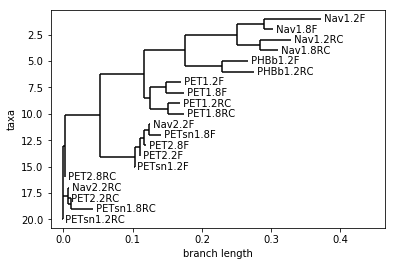

In [35]:
tree.rooted = True
Phylo.draw(tree)

In [11]:
?Phylo.draw